In [ ]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 데이터 구성하기

In [24]:
tag_list = pd.read_csv("/home/piai/바탕화면/B4_제지/02_태그리스트.csv",sep=';', encoding='euc-kr')
tag_list.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
0,TAG_001,Vacuum,1,Approach,증해 및 표백 파트,1ST NASH P/P CURRENT,Current,Measurement,12.0,18.0
1,TAG_002,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CONS,Consistency,Measurement,3.5,4.2
2,TAG_003,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CIC V/V,Consistency,Output,30.0,50.0
3,TAG_004,Mixing Flow,1,Approach,증해 및 표백 파트,MACHINE CHEST TO STOCK BOX 농도,Consistency,Measurement,3.5,4.2
4,TAG_005,Mixing Flow,1,Approach,증해 및 표백 파트,pm21 PCC FLOW,Flow,Measurement,0.0,320.0


In [25]:
tag_list1 = tag_list[['id','기준최소값']]
tag_list2 = tag_list[['id','기준최대값']]
# tag_list2[tag_list2['id'] == 'TAG_004'].set_index("id").to_dict()['기준최대값']['TAG_004']

In [13]:
all_tag = pd.read_csv("/home/piai/바탕화면/B4_제지/01_tags2/tag_end.csv", encoding='euc-kr')
all_tag = all_tag.drop('Unnamed: 0', axis = 1)
all_tag.tail()

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
521363,2021-12-31 14:55:00,14.391347,3.629825,3.626222,135.838685,0.0,0.086278,0.0,100.0,92.638188,...,40.117508,39.971576,39.364815,39.912516,0.114904,0.189613,0.031485,0.035789,47.532919,정상
521364,2021-12-31 14:56:00,14.391303,3.629500,3.626215,135.852610,0.0,0.086709,0.0,100.0,92.637791,...,40.108738,39.860990,39.372183,39.959582,0.115859,0.189603,0.031483,0.035789,47.532919,정상
521365,2021-12-31 14:57:00,14.391260,3.629176,3.626208,135.866536,0.0,0.087139,0.0,100.0,92.637394,...,40.099968,39.750405,39.379555,40.006648,0.116815,0.189593,0.031481,0.035789,47.532919,정상
521366,2021-12-31 14:58:00,14.391216,3.628851,3.626202,135.880461,0.0,0.087569,0.0,100.0,92.636997,...,40.092740,40.433912,39.386927,40.053714,0.117771,0.189583,0.031479,0.035789,47.532919,정상
521367,2021-12-31 14:59:00,14.391173,3.628527,3.626195,135.894387,0.0,0.088000,0.0,100.0,92.636599,...,40.095370,39.765381,39.394299,40.039445,0.118727,0.189573,0.031476,0.035789,47.532919,정상


In [11]:
all_tag[(all_tag['datetime']=='2021-09-30 15:00:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
388906,2021-09-30 15:00:00,13.879591,3.591563,3.603951,93.104557,0.0,0.006454,0.0,100.0,91.855954,...,39.673929,38.889307,39.910762,42.21846,0.09773,0.322345,0.030284,0.049203,35.902923,정상


### 공정별 분류

In [14]:
process_1 = all_tag.iloc[388906:,:40]
process_1.reset_index(inplace=True)
process_1 = process_1.drop('index', axis=1)
process_1

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_043,TAG_044,TAG_046,TAG_047,TAG_048,TAG_049,TAG_050,TAG_052,TAG_054,TAG_056
0,2021-09-30 15:00:00,13.879591,3.591563,3.603951,93.104557,0.0,0.006454,0.0,100.0,91.855954,...,1.102419,0.988035,42.288914,35.476161,697.227889,100.0,65.0,64.999771,99.999771,1.272322
1,2021-09-30 15:01:00,13.879692,3.591387,3.603948,93.095814,0.0,0.006425,0.0,100.0,91.855673,...,1.102377,0.988005,42.285834,35.476161,697.230486,100.0,65.0,64.999771,99.999771,1.272273
2,2021-09-30 15:02:00,13.879792,3.591212,3.603945,93.087070,0.0,0.006395,0.0,100.0,91.855392,...,1.102336,0.987974,42.282754,35.476161,697.233085,100.0,65.0,64.999771,99.999771,1.272224
3,2021-09-30 15:03:00,13.879893,3.591037,3.603943,93.078327,0.0,0.006366,0.0,100.0,91.855111,...,1.102294,0.987944,42.279674,35.476161,697.235684,100.0,65.0,64.999771,99.999771,1.272176
4,2021-09-30 15:04:00,13.879994,3.590861,3.603940,93.069584,0.0,0.006337,0.0,100.0,91.854830,...,1.102253,0.987913,42.276594,35.476161,697.238283,100.0,65.0,64.999771,99.999771,1.272127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132457,2021-12-31 14:55:00,14.391347,3.629825,3.626222,135.838685,0.0,0.086278,0.0,100.0,92.638188,...,1.094987,0.658291,39.629589,39.958784,724.480520,100.0,70.0,55.000114,99.999771,1.246061
132458,2021-12-31 14:56:00,14.391303,3.629500,3.626215,135.852610,0.0,0.086709,0.0,100.0,92.637791,...,1.094986,0.659382,39.629299,39.959871,724.470892,100.0,70.0,55.000114,99.999771,1.246061
132459,2021-12-31 14:57:00,14.391260,3.629176,3.626208,135.866536,0.0,0.087139,0.0,100.0,92.637394,...,1.094985,0.660473,39.629009,39.960958,724.461262,100.0,70.0,55.000114,99.999771,1.246061
132460,2021-12-31 14:58:00,14.391216,3.628851,3.626202,135.880461,0.0,0.087569,0.0,100.0,92.636997,...,1.094983,0.661564,39.628720,39.962046,724.451635,100.0,70.0,55.000114,99.999771,1.246061


In [15]:
process_2 = pd.concat([all_tag['datetime'].iloc[388906:,],all_tag.iloc[388906:,40:53]],axis=1)
process_2.reset_index(inplace=True)
process_2 = process_2.drop('index', axis=1)
process_2.head()

,datetime,TAG_057,TAG_058,TAG_060,TAG_062,TAG_063,TAG_064,TAG_065,TAG_066,TAG_067,TAG_068,TAG_069,TAG_070,TAG_071
0,2021-09-30 15:00:00,100.0,100.0,1010.051436,34.574100,5.347105,6.191016,42.290189,127.438508,105.868071,118.888701,126.056107,135.825619,8.842537
1,2021-09-30 15:01:00,100.0,100.0,1010.051392,34.573856,5.347748,6.059676,42.287272,127.128686,105.555866,119.014218,126.018570,135.566126,8.842687
2,2021-09-30 15:02:00,100.0,100.0,1010.051335,34.573612,5.348391,6.120596,42.284354,125.435706,106.351645,119.139735,125.981033,135.306633,8.842837
3,2021-09-30 15:03:00,100.0,100.0,1010.051294,34.573368,5.349033,6.174653,42.281437,126.123770,106.758224,119.220700,125.943490,135.047140,8.842987
4,2021-09-30 15:04:00,100.0,100.0,1010.051254,34.573124,5.334392,6.071754,42.278519,126.305518,106.609230,119.237135,125.905952,134.787648,8.843137


In [16]:
process_3 = pd.concat([all_tag['datetime'].iloc[388906:,],all_tag.iloc[388906:,53:64]],axis=1)
process_3.reset_index(inplace=True)
process_3 = process_3.drop('index', axis=1)
process_3.head()

,datetime,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078,TAG_079,TAG_080,TAG_084,TAG_085
0,2021-09-30 15:00:00,89.225517,87.158203,9.051023,97.851261,101.860246,13.842146,53.362756,134.371261,100.0,0.074428,534.233622
1,2021-09-30 15:01:00,89.225598,87.158203,9.051043,97.850796,101.858968,13.842788,53.362351,134.398748,100.0,0.074639,534.498790
2,2021-09-30 15:02:00,89.225679,87.158203,9.051064,97.850331,101.857691,13.843430,53.361947,134.426232,100.0,0.074850,533.901356
3,2021-09-30 15:03:00,89.225760,87.158203,9.051085,97.849866,101.856414,13.844072,53.361542,134.453718,100.0,0.075061,533.303924
4,2021-09-30 15:04:00,89.225841,87.158203,9.051105,97.849401,101.855137,13.844714,53.361137,134.481205,100.0,0.075272,532.706491


In [17]:
process_4 = pd.concat([all_tag['datetime'].iloc[388906:,],all_tag.iloc[388906:,64:140]], axis=1)
process_4.reset_index(inplace=True)
process_4 = process_4.drop('index', axis=1)
process_4.tail()

,datetime,TAG_087,TAG_088,TAG_089,TAG_090,TAG_099,TAG_100,TAG_102,TAG_103,TAG_104,...,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193
132457,2021-12-31 14:55:00,681.221097,700.320434,29.578664,2.562326,-0.355153,52.171682,55.694858,59.150255,0.497018,...,40.474829,40.117508,39.971576,39.364815,39.912516,0.114904,0.189613,0.031485,0.035789,47.532919
132458,2021-12-31 14:56:00,678.979957,702.397174,29.535706,2.562326,-0.355153,55.586403,55.694858,63.239438,0.497030,...,40.423817,40.108738,39.860990,39.372183,39.959582,0.115859,0.189603,0.031483,0.035789,47.532919
132459,2021-12-31 14:57:00,680.214629,701.784950,30.298024,2.562326,-0.355153,59.001125,55.694858,61.210408,0.497042,...,40.372805,40.099968,39.750405,39.379555,40.006648,0.116815,0.189593,0.031481,0.035789,47.532919
132460,2021-12-31 14:58:00,681.451531,701.540532,29.098316,2.562326,-0.355153,60.513144,55.694858,57.663838,0.497055,...,40.321792,40.092740,40.433912,39.386927,40.053714,0.117771,0.189583,0.031479,0.035789,47.532919
132461,2021-12-31 14:59:00,678.235747,699.173623,28.860493,2.562326,-0.355153,59.990668,55.694858,60.586001,0.497067,...,40.270780,40.095370,39.765381,39.394299,40.039445,0.118727,0.189573,0.031476,0.035789,47.532919


In [26]:
tag_list1 = tag_list1.drop([2,8,9,18,22,24,25,27,28,29,35,36,38,44,50,52,54,58,60,80,81,82,85,90,91,92,94,95,96,97,100,112,115,119,120,122,124,125,130,132,133,150,154,155,156,160,165,172,173,175,177,178,179,193,194,195], axis=0)
tag_list1.reset_index(inplace=True)
tag_list1.drop('index', axis=1, inplace=True)
tag_list1.head()

,id,기준최소값
0,TAG_001,12.0
1,TAG_002,3.5
2,TAG_004,3.5
3,TAG_005,0.0
4,TAG_006,0.0


In [27]:
tag_list2 = tag_list2.drop([2,8,9,18,22,24,25,27,28,29,35,36,38,44,50,52,54,58,60,80,81,82,85,90,91,92,94,95,96,97,100,112,115,119,120,122,124,125,130,132,133,150,154,155,156,160,165,172,173,175,177,178,179,193,194,195], axis=0)
tag_list2.reset_index(inplace=True)
tag_list2.drop('index', axis=1, inplace=True)
tag_list2.head()

,id,기준최대값
0,TAG_001,18.0
1,TAG_002,4.2
2,TAG_004,4.2
3,TAG_005,320.0
4,TAG_006,100.0


# 기준최소값>=0, LCL<0 데이터 처리

In [28]:
UCL1 = {}
LCL1 = {}

for i in range(1,40):
    UCL1[i-1] = process_1.iloc[:,i].mean()+3*np.std(process_1.iloc[:,i])
    LCL1[i-1] = process_1.iloc[:,i].mean()-3*np.std(process_1.iloc[:,i])
    min = tag_list1.loc[i-1,'기준최소값']
    if (min>=0) and (LCL1[i-1]<0):
        LCL1[i-1] = 0

In [29]:
UCL2 = {}
LCL2 = {}

for i in range(1,14):
    UCL2[i-1] = process_2.iloc[:,i].mean()+3*np.std(process_2.iloc[:,i])
    LCL2[i-1] = process_2.iloc[:,i].mean()-3*np.std(process_2.iloc[:,i])
    min = tag_list1.loc[i+38,'기준최소값']
    if (min>=0) and (LCL2[i-1]<0):
        LCL2[i-1] = 0

In [30]:
UCL3 = {}
LCL3 = {}

for i in range(1,12):
    UCL3[i-1] = process_3.iloc[:,i].mean()+3*np.std(process_3.iloc[:,i])
    LCL3[i-1] = process_3.iloc[:,i].mean()-3*np.std(process_3.iloc[:,i])
    min = tag_list1.loc[i+51,'기준최소값']
    if (min>=0) and (LCL3[i-1]<0):
        LCL3[i-1] = 0

In [31]:
UCL4 = {}
LCL4 = {}

for i in range(1,77):
    UCL4[i-1] = process_4.iloc[:,i].mean()+3*np.std(process_4.iloc[:,i])
    LCL4[i-1] = process_4.iloc[:,i].mean()-3*np.std(process_4.iloc[:,i])
    min = tag_list1.loc[i+62,'기준최소값']
    if (min>=0) and (LCL4[i-1]<0):
        LCL4[i-1] = 0

# 0.3%기준 설정 시작

### 1공정

In [32]:
df1 = process_1.drop('datetime',axis=1)
count_1=0
a1 = []
count_fk = 0
n_name=''
e = 0
for i in df1:
    count_1 = 0
    e += 1
    for j in df1[i]:   
        if (j >= LCL1[e-1]) and (j <= UCL1[e-1]):
            count_1 += 1
        else:
            None
    kjk = 132462-count_1
    print(i,'관리도 내에 존재하는 수{},밖의 개수{}, outlier비율{}'.format(count_1,kjk, 100*kjk/132462))
    if (100*kjk/132462) > 2.5:
        n_name = i
        a1.append(n_name)
        count_fk +=1

print(count_fk)

TAG_001 관리도 내에 존재하는 수131711,밖의 개수751, outlier비율0.566955051259984
TAG_002 관리도 내에 존재하는 수132462,밖의 개수0, outlier비율0.0
TAG_004 관리도 내에 존재하는 수132462,밖의 개수0, outlier비율0.0
TAG_005 관리도 내에 존재하는 수132462,밖의 개수0, outlier비율0.0
TAG_006 관리도 내에 존재하는 수129174,밖의 개수3288, outlier비율2.482221316302034
TAG_007 관리도 내에 존재하는 수130068,밖의 개수2394, outlier비율1.8073107759206415
TAG_008 관리도 내에 존재하는 수125575,밖의 개수6887, outlier비율5.1992269481058715
TAG_011 관리도 내에 존재하는 수132451,밖의 개수11, outlier비율0.008304268393954492
TAG_012 관리도 내에 존재하는 수131182,밖의 개수1280, outlier비율0.9663148676601592
TAG_013 관리도 내에 존재하는 수128457,밖의 개수4005, outlier비율3.023508628889795
TAG_014 관리도 내에 존재하는 수130728,밖의 개수1734, outlier비율1.3090546722833718
TAG_015 관리도 내에 존재하는 수132248,밖의 개수214, outlier비율0.16155576693693285
TAG_016 관리도 내에 존재하는 수132058,밖의 개수404, outlier비율0.3049931301052377
TAG_017 관리도 내에 존재하는 수131964,밖의 개수498, outlier비율0.3759568781990307
TAG_018 관리도 내에 존재하는 수132332,밖의 개수130, outlier비율0.09814135374673491
TAG_020 관리도 내에 존재하는 수128074,밖의 개수4388, outlier비율3.31264

### 2공정

In [33]:
df2 = process_2.drop('datetime',axis=1)
count_2=0
a2 = []
count_fk = 0
n_name=''
e = 0
for i in df2:
    count_2 = 0
    e += 1
    for j in df2[i]:   
        if (j >= LCL2[e-1]) and (j <= UCL2[e-1]):
            count_2 += 1
        else:
            None
    kjk = 132462-count_2
#    print(i,'관리도 내에 존재하는 수{},밖의 개수{}, outlier비율{}'.format(count_2,kjk, 100*kjk/521368))
    if (100*kjk/132462) > 2.5:
        n_name = i
        a2.append(n_name)
        count_fk +=1

count_fk

2

### 3공정

In [34]:
df3 = process_3.drop('datetime',axis=1)
count_3=0
a3 = []
count_fk = 0
n_name=''
e = 0
for i in df3:
    count_3 = 0
    e += 1
    for j in df3[i]:   
        if (j >= LCL3[e-1]) and (j <= UCL3[e-1]):
            count_3 += 1
        else:
            None
    kjk = 132462-count_3
#    print(i,'관리도 내에 존재하는 수{},밖의 개수{}, outlier비율{}'.format(count_3,kjk, 100*kjk/521368))
    if (100*kjk/132462) > 2.5:
        n_name = i
        a3.append(n_name)
        count_fk +=1

count_fk

4

### 4공정

In [35]:
df4 = process_4.drop('datetime',axis=1)
count_4=0
a4 = []
count_fk = 0
n_name=''
e = 0
for i in df4:
    count_4 = 0
    e += 1
    for j in df4[i]:   
        if (j >= LCL4[e-1]) and (j <= UCL4[e-1]):
            count_4 += 1
        else:
            None
    kjk = 132462-count_4
#    print(i,'관리도 내에 존재하는 수{},밖의 개수{}, outlier비율{}'.format(count_4,kjk, 100*kjk/521368))
    if (100*kjk/132462) > 2.5:
        n_name = i
        a4.append(n_name)
        count_fk +=1

count_fk

23

# 2.5% 기준 설정 끝

# 안정성 확인 - Control Chart

In [46]:
a1

['TAG_008',
 'TAG_013',
 'TAG_020',
 'TAG_031',
 'TAG_040',
 'TAG_049',
 'TAG_052',
 'TAG_056']

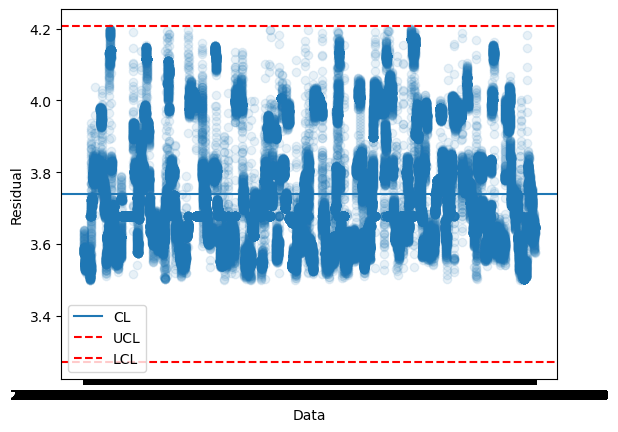

In [42]:
# 안정1
%matplotlib inline
plt.scatter(process_1['datetime'], process_1['TAG_002'], alpha = 0.1)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=process_1['TAG_002'].mean(), linestyle="-", label='CL')
plt.axhline(y=UCL1[1], linestyle='--', color='red', label='UCL')
plt.axhline(y=LCL1[1], linestyle='--', color='red', label='LCL')
#plt.axhline(y=tag_list1[tag_list1['id'] == 'TAG_002'].set_index("id").to_dict()['기준최소값']['TAG_002'], linestyle='-', color='pink', label='USL')
#plt.axhline(y=tag_list2[tag_list2['id'] == 'TAG_002'].set_index("id").to_dict()['기준최대값']['TAG_002'], linestyle='-', color='pink', label='LSL')
plt.legend()

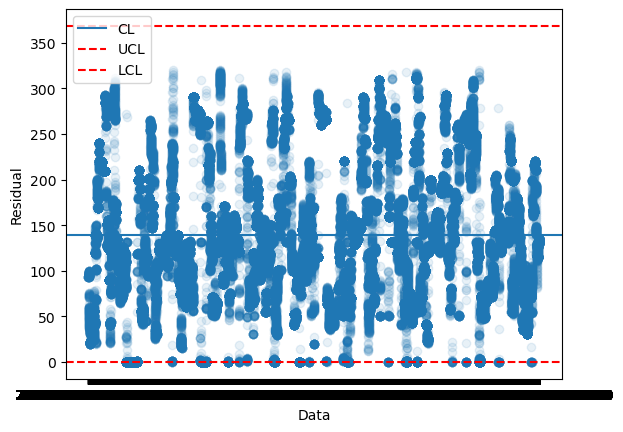

In [49]:
# 안정2
plt.scatter(process_1['datetime'], process_1['TAG_005'], alpha = 0.1)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=process_1['TAG_005'].mean(), linestyle="-", label='CL')
plt.axhline(y=UCL1[3], linestyle='--', color='red', label='UCL')
plt.axhline(y=LCL1[3], linestyle='--', color='red', label='LCL')
#plt.axhline(y=tag_list1[tag_list1['id'] == 'TAG_014'].set_index("id").to_dict()['기준최소값']['TAG_014'], linestyle='-', color='pink', label='USL')
#plt.axhline(y=tag_list2[tag_list2['id'] == 'TAG_014'].set_index("id").to_dict()['기준최대값']['TAG_014'], linestyle='-', color='pink', label='LSL')
plt.legend()

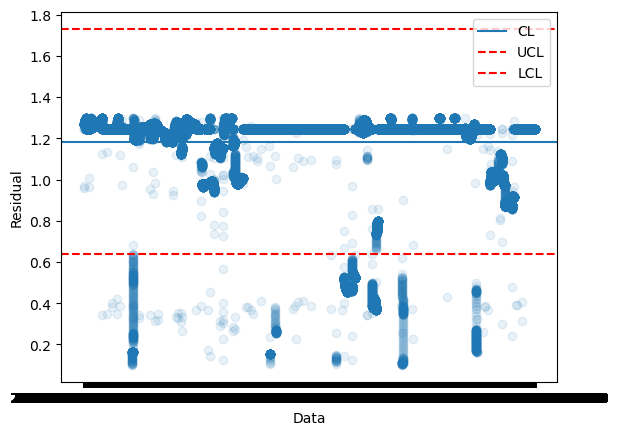

In [48]:
# 불안정1
plt.scatter(process_1['datetime'], process_1['TAG_056'], alpha = 0.1)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=process_1['TAG_056'].mean(), linestyle="-", label='CL')
plt.axhline(y=UCL1[38], linestyle='--', color='red', label='UCL')
plt.axhline(y=LCL1[38], linestyle='--', color='red', label='LCL')
#plt.axhline(y=tag_list1[tag_list1['id'] == 'TAG_060'].set_index("id").to_dict()['기준최소값']['TAG_060'], linestyle='-', color='pink', label='USL')
#plt.axhline(y=tag_list2[tag_list2['id'] == 'TAG_060'].set_index("id").to_dict()['기준최대값']['TAG_060'], linestyle='-', color='pink', label='LSL')
plt.legend()

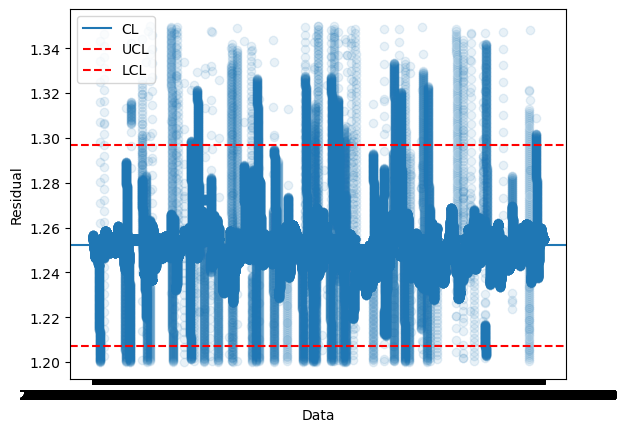

In [45]:
# 불안정2
plt.scatter(process_1['datetime'], process_1['TAG_040'], alpha = 0.1)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=process_1['TAG_040'].mean(), linestyle="-", label='CL')
plt.axhline(y=UCL1[26], linestyle='--', color='red', label='UCL')
plt.axhline(y=LCL1[26], linestyle='--', color='red', label='LCL')
#plt.axhline(y=tag_list1[tag_list1['id'] == 'TAG_034'].set_index("id").to_dict()['기준최소값']['TAG_034'], linestyle='-', color='pink', label='USL')
#plt.axhline(y=tag_list2[tag_list2['id'] == 'TAG_034'].set_index("id").to_dict()['기준최대값']['TAG_034'], linestyle='-', color='pink', label='LSL')
plt.legend()

# 카이제곱

In [63]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

df = pd.DataFrame({'process1':[16,40], 'process2':[2,13], 'process3':[3,12], 'process4':[35,75]})
chi, pval, dof, expected = stats.chi2_contingency(df)
print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expevted value: \n{}'.format(expected.round(3)))

chi-square test
chisq: 1.368
p-value: 0.242
degree pf freedom: 1
expevted value: 
[[ 4.44 32.56]
 [10.56 77.44]]
